<a href="https://colab.research.google.com/gist/urbanicsandras/10a8c2789a90defef85c768649bf1d24/3-kishazi_urbanicsandras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# import libraries
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model # Model
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization# Dense ~ Fully connected, Linear, "MLP"
from tensorflow.keras.initializers import HeNormal, HeUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

In [117]:
# load data
col_names = ['date','d_mean','d_max','d_min','d_prec']
data = pd.read_csv("/content/drive/My Drive/Deep Learning a gyakorlatban/3/eghajlati_adatsor_1901-2019+Budapest/BP_d.csv",
                   sep=';', usecols=[0,1,2,3,4] , header = 0, names = col_names,
                   parse_dates=['date'])

In [118]:
# Description of elements in the header
# d_mean	daily mean temperature [°C]
# d_max	daily maximum temperature [°C]
# d_min	daily minimum temperature [°C]
# d_prec	daily precipitation amount [mm]

data.head()

,date,d_mean,d_max,d_min,d_prec
0,1901-01-01,-5.7,-0.4,-9.2,1.9
1,1901-01-02,-9.3,-6.6,-11.3,0.0
2,1901-01-03,-9.1,-6.6,-10.8,0.8
3,1901-01-04,-11.0,-9.8,-12.4,0.2
4,1901-01-05,-11.1,-9.0,-15.5,0.0


In [119]:
# make 3 columns for year, month and day datas (from column date)
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data['year'] = pd.DatetimeIndex(data['date']).year

In [120]:
data.head()

,date,d_mean,d_max,d_min,d_prec,month,day,year
0,1901-01-01,-5.7,-0.4,-9.2,1.9,1,1,1901
1,1901-01-02,-9.3,-6.6,-11.3,0.0,1,2,1901
2,1901-01-03,-9.1,-6.6,-10.8,0.8,1,3,1901
3,1901-01-04,-11.0,-9.8,-12.4,0.2,1,4,1901
4,1901-01-05,-11.1,-9.0,-15.5,0.0,1,5,1901


In [121]:
#data2 = pd.get_dummies(data.day, prefix='day')
#data3 = pd.get_dummies(data.month, prefix='month')

#data = pd.concat([data, data3, data2], axis=1)
#data.head()

In [122]:
#data.iloc[:,7:]

In [123]:
#### X features and y target
X = data[['year','month', 'day']]
#X = data.iloc[:,7:]
y = data['d_mean']


In [124]:
# make validation (20%), test (10%) and train (70%) sets 
valid_split = 0.2
test_split  = 0.1
v_start = int(X.shape[0]*(1-valid_split-test_split))
t_start = int(X.shape[0]*(1-test_split))
X_train, y_train = X[:v_start],        y[:v_start]
X_valid, y_valid = X[v_start:t_start], y[v_start:t_start]
X_test , y_test  = X[t_start:],        y[t_start:]

In [125]:
# scale the train, valid and test splits with scaler of train data 
### scaler = StandardScaler().fit(X_train)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test  = scaler.transform(X_test) 

In [213]:
# build the neural network
# activation function: tanh
# optimazer: Adam, learning rate: 1e-4
# loss function: mean_squared_error
# 3 input neuron: year, month, day

act='tanh'

model = Sequential()
model.add(Dense(128, kernel_regularizer=l2(l2=0.0005), input_shape=(3,)))
model.add(Activation(act))
model.add(Dense(128))
model.add(Activation(act))
model.add(Dense(64))
model.add(Dense(1))

opt = Adam(lr=1e-4)
loss = 'mean_squared_error'

model.compile(loss=loss, optimizer=opt)

In [214]:
# use early stopping
es  = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=40, verbose=1, restore_best_weights=True)

In [215]:
# training
# batch size: 128, epochs: 250 (but earlystopping stops earlier the training)
network_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=128, epochs=250, verbose=1,shuffle=True, callbacks=[es])

Epoch 1/250
238/238 [==============================] - 1s 3ms/step - loss: 117.5319 - val_loss: 77.5030
Epoch 2/250
238/238 [==============================] - 1s 3ms/step - loss: 73.1031 - val_loss: 75.1171
Epoch 3/250
238/238 [==============================] - 1s 3ms/step - loss: 71.9840 - val_loss: 73.5422
Epoch 4/250
238/238 [==============================] - 1s 3ms/step - loss: 70.9624 - val_loss: 72.8089
Epoch 5/250
238/238 [==============================] - 1s 3ms/step - loss: 69.6768 - val_loss: 70.8356
Epoch 6/250
238/238 [==============================] - 1s 3ms/step - loss: 67.5546 - val_loss: 68.4361
Epoch 7/250
238/238 [==============================] - 1s 3ms/step - loss: 63.7063 - val_loss: 63.1085
Epoch 8/250
238/238 [==============================] - 1s 3ms/step - loss: 55.5927 - val_loss: 52.0941
Epoch 9/250
238/238 [==============================] - 1s 3ms/step - loss: 40.8243 - val_loss: 38.3847
Epoch 10/250
238/238 [==============================] - 1s 3ms/step - lo

In [219]:
# print model parameters
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               512       
_________________________________________________________________
activation_42 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_43 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 65        
Total params: 25,345
Trainable params: 25,345
Non-trainable params: 0
_________________________________________________

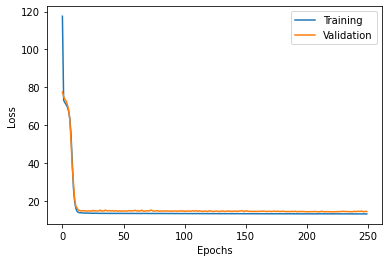

In [220]:
# plot loss and validation loss values
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    #plt.figure()
    #plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')
    #plt.plot(network_history.history['accuracy'])
    #plt.plot(network_history.history['val_accuracy'])
    #plt.legend(['Training', 'Validation'], loc='lower right')
    #plt.show()

plot_history(network_history)

In [221]:
# prediction for X_test set
preds = model.predict(X_test)

In [222]:
# predictions and expected values
d = {'pred': np.array(preds.ravel()), 'true': np.array(y_test)}
df = pd.DataFrame(data=d)
df.head()

,pred,true
0,2.370329,6.0
1,2.434855,6.2
2,2.502480,5.4
3,2.573398,5.3
4,2.647791,4.1


In [223]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['true'], df['pred'])

14.604352435837985

In [224]:
# prediction  function
# input is a list of string dates in format: YYYY-mm-dd (year-month-day)
# output is a dataframe of dates and the predictions

def prediction(a):
  year = []
  month = []
  day = []
  for i in range(len(a)):
    date = datetime.strptime(a[i], '%Y-%m-%d')
    year.append(date.year)
    month.append(date.month)
    day.append(date.day)
  
  d = {'year':year, 'month':month, 'day':day}
  df = pd.DataFrame(data=d)

  df_scal = scaler.transform(df)
  pred = model.predict(df_scal)

  d2 = {'pred': np.array(pred.ravel())}
  df2 = pd.DataFrame(data=d2)
  df3 = pd.concat([df, df2], axis=1)

  return df3

Predictions of days October 28., November 3. and Noveber 24.

In [231]:
pred0=['2020-10-28','2020-11-03','2020-11-24']
prediction(pred0)

,year,month,day,pred
0,2020,10,28,10.367250
1,2020,11,3,9.729785
2,2020,11,24,5.756809


Prediction of a day

In [232]:
pred1=['2020-12-25']
prediction(pred1)

,year,month,day,pred
0,2020,12,25,1.101656


Prediction of a week

In [236]:
pred2=['2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03']
prediction(pred2)

,year,month,day,pred
0,2020,10,28,10.367250
1,2020,10,29,10.210549
2,2020,10,30,10.056715
3,2020,10,31,9.905712
4,2020,11,1,10.207463
5,2020,11,2,9.966374
6,2020,11,3,9.729785


Prediction of a month

In [235]:
pred3 =['2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03',
        '2020-11-04','2020-11-05','2020-11-06','2020-11-07','2020-11-08','2020-11-09','2020-11-10',
        '2020-11-11','2020-11-12','2020-11-13','2020-11-14','2020-11-15','2020-11-16','2020-11-17',
        '2020-11-18','2020-11-19','2020-11-20','2020-11-21','2020-11-22','2020-11-23','2020-11-24',
        '2020-11-25','2020-11-26','2020-11-27','2020-11-28']
prediction(pred3)

,year,month,day,pred
0,2020,10,28,10.367252
1,2020,10,29,10.210549
2,2020,10,30,10.056714
3,2020,10,31,9.905712
4,2020,11,1,10.207462
5,2020,11,2,9.966375
6,2020,11,3,9.729788
7,2020,11,4,9.497722
8,2020,11,5,9.270184
9,2020,11,6,9.047171
